##Diabetes Prediction

#Dataset

First, let's load the PIMA dataset. This dataset contains medical information about Pima Indians, such as their age, body mass index (BMI), blood pressure,Insulin,Pregnancies,Glucose level,Skin Thickness,Diabetes Pedigree Function. The goal is to predict whether or not a person has diabetes based on this information.

Start by loading the dataset using pandas.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('diabetes.csv')


Total number of records and columns

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Starting 5 rows in the data set

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Last 5 rows in the dataset

In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Description

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#Data Preprocessing

Before we can use the data to train our machine learning models, we need to preprocess it. This includes handling missing values, scaling the features, and splitting the data into training and testing sets.

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


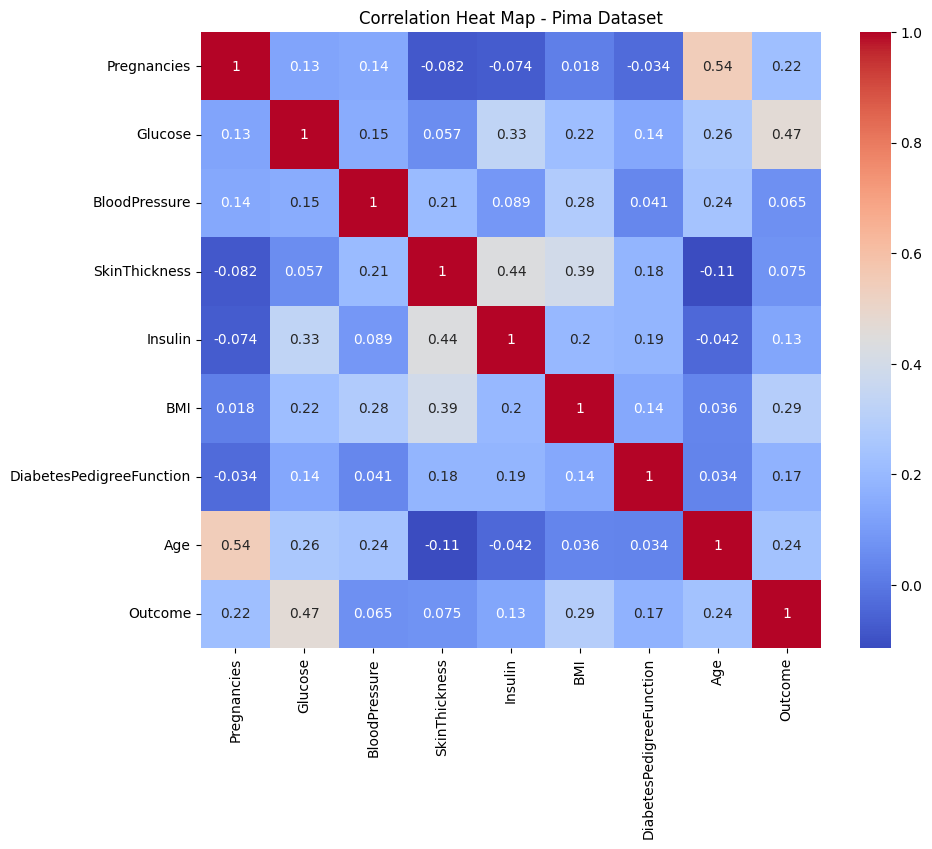

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heat Map - Pima Dataset")
plt.show()

In [ ]:
# split into features and target
#X = df.iloc[:, :-1]
selected_columns = ["Glucose", "BMI", "Age", "DiabetesPedigreeFunction","BloodPressure","Pregnancies"]
X = df[selected_columns]
y = df.iloc[:, -1]
#Replacing rows with 0 with nan
X=X.replace({0: np.nan})
#filling the nans with mean of the column
X.fillna(X.mean(), inplace=True)


In [ ]:
X

,Glucose,BMI,Age,DiabetesPedigreeFunction,BloodPressure,Pregnancies
0,148.0,33.6,50,0.627,72.0,6.000000
1,85.0,26.6,31,0.351,66.0,1.000000
2,183.0,23.3,32,0.672,64.0,8.000000
3,89.0,28.1,21,0.167,66.0,1.000000
4,137.0,43.1,33,2.288,40.0,4.494673
...,...,...,...,...,...,...
763,101.0,32.9,63,0.171,76.0,10.000000
764,122.0,36.8,27,0.340,70.0,2.000000
765,121.0,26.2,30,0.245,72.0,5.000000
766,126.0,30.1,47,0.349,60.0,1.000000


In [ ]:
#Check if any missing values are there
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:

# scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#KNN

Let's start with the K-Nearest Neighbors (KNN) algorithm. This is a simple algorithm that classifies a new data point based on the class of its K nearest neighbors in the training set.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predict on the test set
y_pred = knn.predict(X_test)

# calculate accuracy
from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, y_pred)
knn_accuracy=round(knn_accuracy,4)
print(f'KNN accuracy:{knn_accuracy}')


KNN accuracy:0.7078


#SVM

Let's try the Support Vector Machine (SVM) algorithm. This is a powerful algorithm that tries to find the best hyperplane that separates the classes in the data.

In [ ]:
from sklearn.svm import SVC

# train the model
svm = SVC(kernel='rbf', gamma='auto', random_state=42)
svm.fit(X_train, y_train)

# predict on the test set
y_pred = svm.predict(X_test)

# calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred)
svm_accuracy=round(svm_accuracy,4)
print(f'SVM accuracy: {svm_accuracy}')


SVM accuracy: 0.7792


#MultiLayer perceptron

In [ ]:
#Multi Layer Perceptron
#Hidden layers of 2 with 10 neurons
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=600,random_state=42)
mlp_model.fit(X_train, y_train)

y_pred = mlp_model.predict(X_test)
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_accuracy=round(mlp_accuracy,4)
print(f"MLP Accuracy: {mlp_accuracy}")


MLP Accuracy: 0.7403


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(random_state=42)
RF_model.fit(X_train, y_train)

y_pred =RF_model.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
RF_accuracy=round(RF_accuracy,4)
print(f"RF_Accuracy:{RF_accuracy}")

RF_Accuracy:0.7727


#Comparision of  the accuracies of the four algorithms using a bar chart


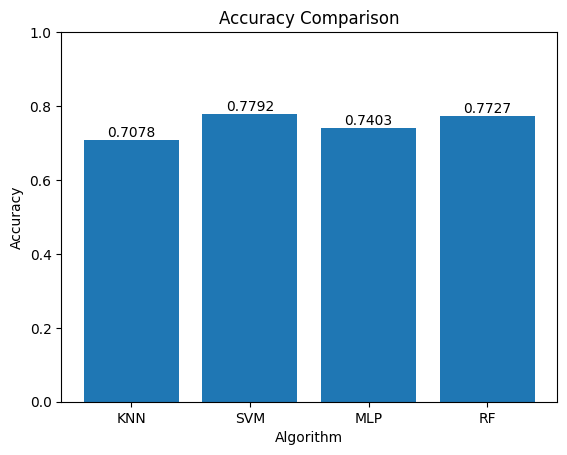

In [ ]:
import matplotlib.pyplot as plt

labels = ['KNN' ,'SVM','MLP','RF']

accuracies = [knn_accuracy,svm_accuracy,mlp_accuracy,RF_accuracy]

plt.bar(labels, accuracies)
plt.ylim([0, 1])
plt.title('Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
# Add text annotations on top of each data point
for i, j in zip(labels, accuracies):
    plt.text(i, j, str(j), ha='center', va='bottom')
plt.show()
